<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=eea7dadbe2904e3f4453b0712e947eb033c49f0de35ac2aa04c4a21b64666e2b
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [67]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ISLP import load_data
from ISLP import confusion_table

sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm



# Ejercicios Conceptuales


## ejercicio 6


### a)

In [ ]:
# tenemos los siguientes datos:
b0 = -6
b1 = 0.05
b2 = 1


In [ ]:
# estimando la prob(y=k\X=x)
# x1 = hours studied
# x2 = undergrad GPA
# Y = Mark (A)
x1 = 40
x2 = 3.5
y = "A"

p_x = np.exp(b0 + b1*x1 + b2*x2) / (1 + np.exp(b0 + b1*x1 + b2*x2))
print(p_x)

0.37754066879814546


### b)

In [ ]:
p_x = 0
x1 = 40
while p_x < 0.5:
  x1 += 1
  p_x = np.exp(b0 + b1*x1 + b2*x2) / (1 + np.exp(b0 + b1*x1 + b2*x2))
print(f"with a value of x1: {x1}, we have a 50% chance of getting and A")

with a value of x1: 50, we have a 50% chance of getting and A


## Ejercicio 7

Bayes's theorem

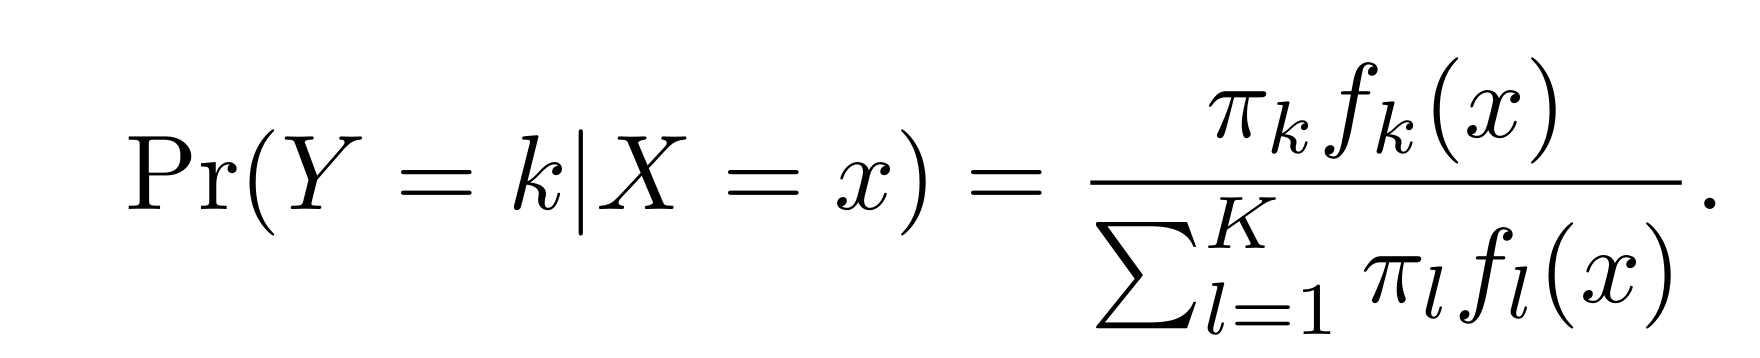

we want to predict if a stock will issue a dividend this year ("Yes" or "No") k = 2
X : Last year percent profit (p = 1)
$$\bar{X}_{yes} = 10$$
$$\bar{X} _{no}= 0$$
$$\hat{\sigma}^2 = 36$$
$$\pi_{yes} = 0.8$$
$$\pi_{no} = 0.2$$

In [ ]:
# we want to predict if a stock will issue a dividend this year ("Yes" or "No") k = 2
# X : Last year percent profit (p = 1)
x = 4
u_yes = 10
u_no = 0
var = 36
pApri_yes = 0.8
pApri_no = 0.2
p_yes = (pApri_yes * np.exp((-(x - u_yes) ** 2)/(2 * var ))) / (pApri_yes * np.exp((-(x - u_yes) ** 2)/(2 * var)) + pApri_no * np.exp((-(x - u_no) ** 2)/(2 * var )))

In [ ]:
p_yes

np.float64(0.7518524532975261)

##Ejercicio 8


En este caso podemos decir que elegimos el caso del test error rate de 30% correspondiente a el uso de la Logistic regresion. Debido a que es menor que el error rate de la 1-nn.
$$total\ error\ rate\ 1nn = 18% $$
$$total\ error\ rate\ 1nn = \frac{test\ error\ rate + training\ error\ rate}{2}$$
Cuando k tiene un parametros de 1, en clasificacion decimos que el algoritmo knn solo buscara 1 vecino el cual es el mismo punto. provocando que en el caso del training error rate sea de 0 ya que es un caso de overfitting.

$$total\ error\ rate\ 1nn = \frac{test\ error\ rate + 0\%}{2} = 18\%$$
$$test\ error\ rate\ 1nn = 36\%$$


## Ejercicio 9

### a

Tenemos que los odds:
$$odds=\frac{P(X)}{1-P(X)}$$
O dicho de otra forma, exito sobre fracaso.
$$0.37=\frac{P(X)}{1-P(X)}$$
$$0.37\times(1-P(X))=P(X)$$
$$0.37-0.37\times P(X)=P(X)$$
$$0.37=P(X)+0.37\times P(X)$$
$$\frac{0.37}{1.37}=P(X)$$
$$0.2707=P(X)$$




### b

X: chance of defaulting
$$P(X) = 0.16\%$$
$$odds = \frac{0.16}{0.84}$$
$$odds = 0.19$$



In [ ]:
0.16/0.84

0.1904761904761905

# Ejercicios Aplicados

## Ejercicio 13


In [3]:
weekly = load_data("Weekly")

In [ ]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [ ]:
weekly.Year.value_counts()

,count
Year,
1996,53
2007,53
1992,52
1993,52
1991,52
2002,52
1994,52
1997,52
1995,52


In [ ]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
weekly.Direction.value_counts()

,count
Direction,
Up,605
Down,484


In [ ]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [ ]:
correlation = weekly.drop("Direction", axis=1).corr()
correlation

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

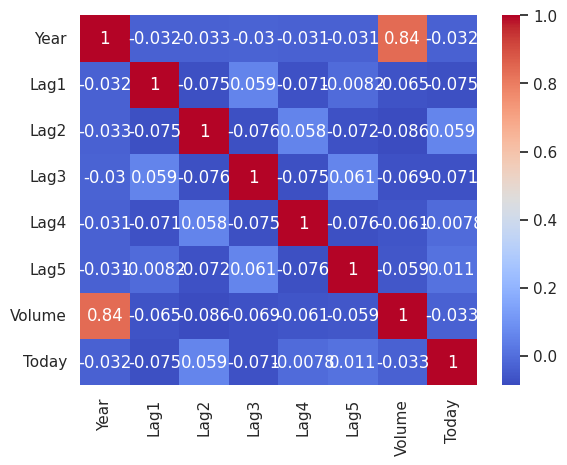

In [ ]:
sns.heatmap(correlation,
            annot=True,
            cmap="coolwarm")

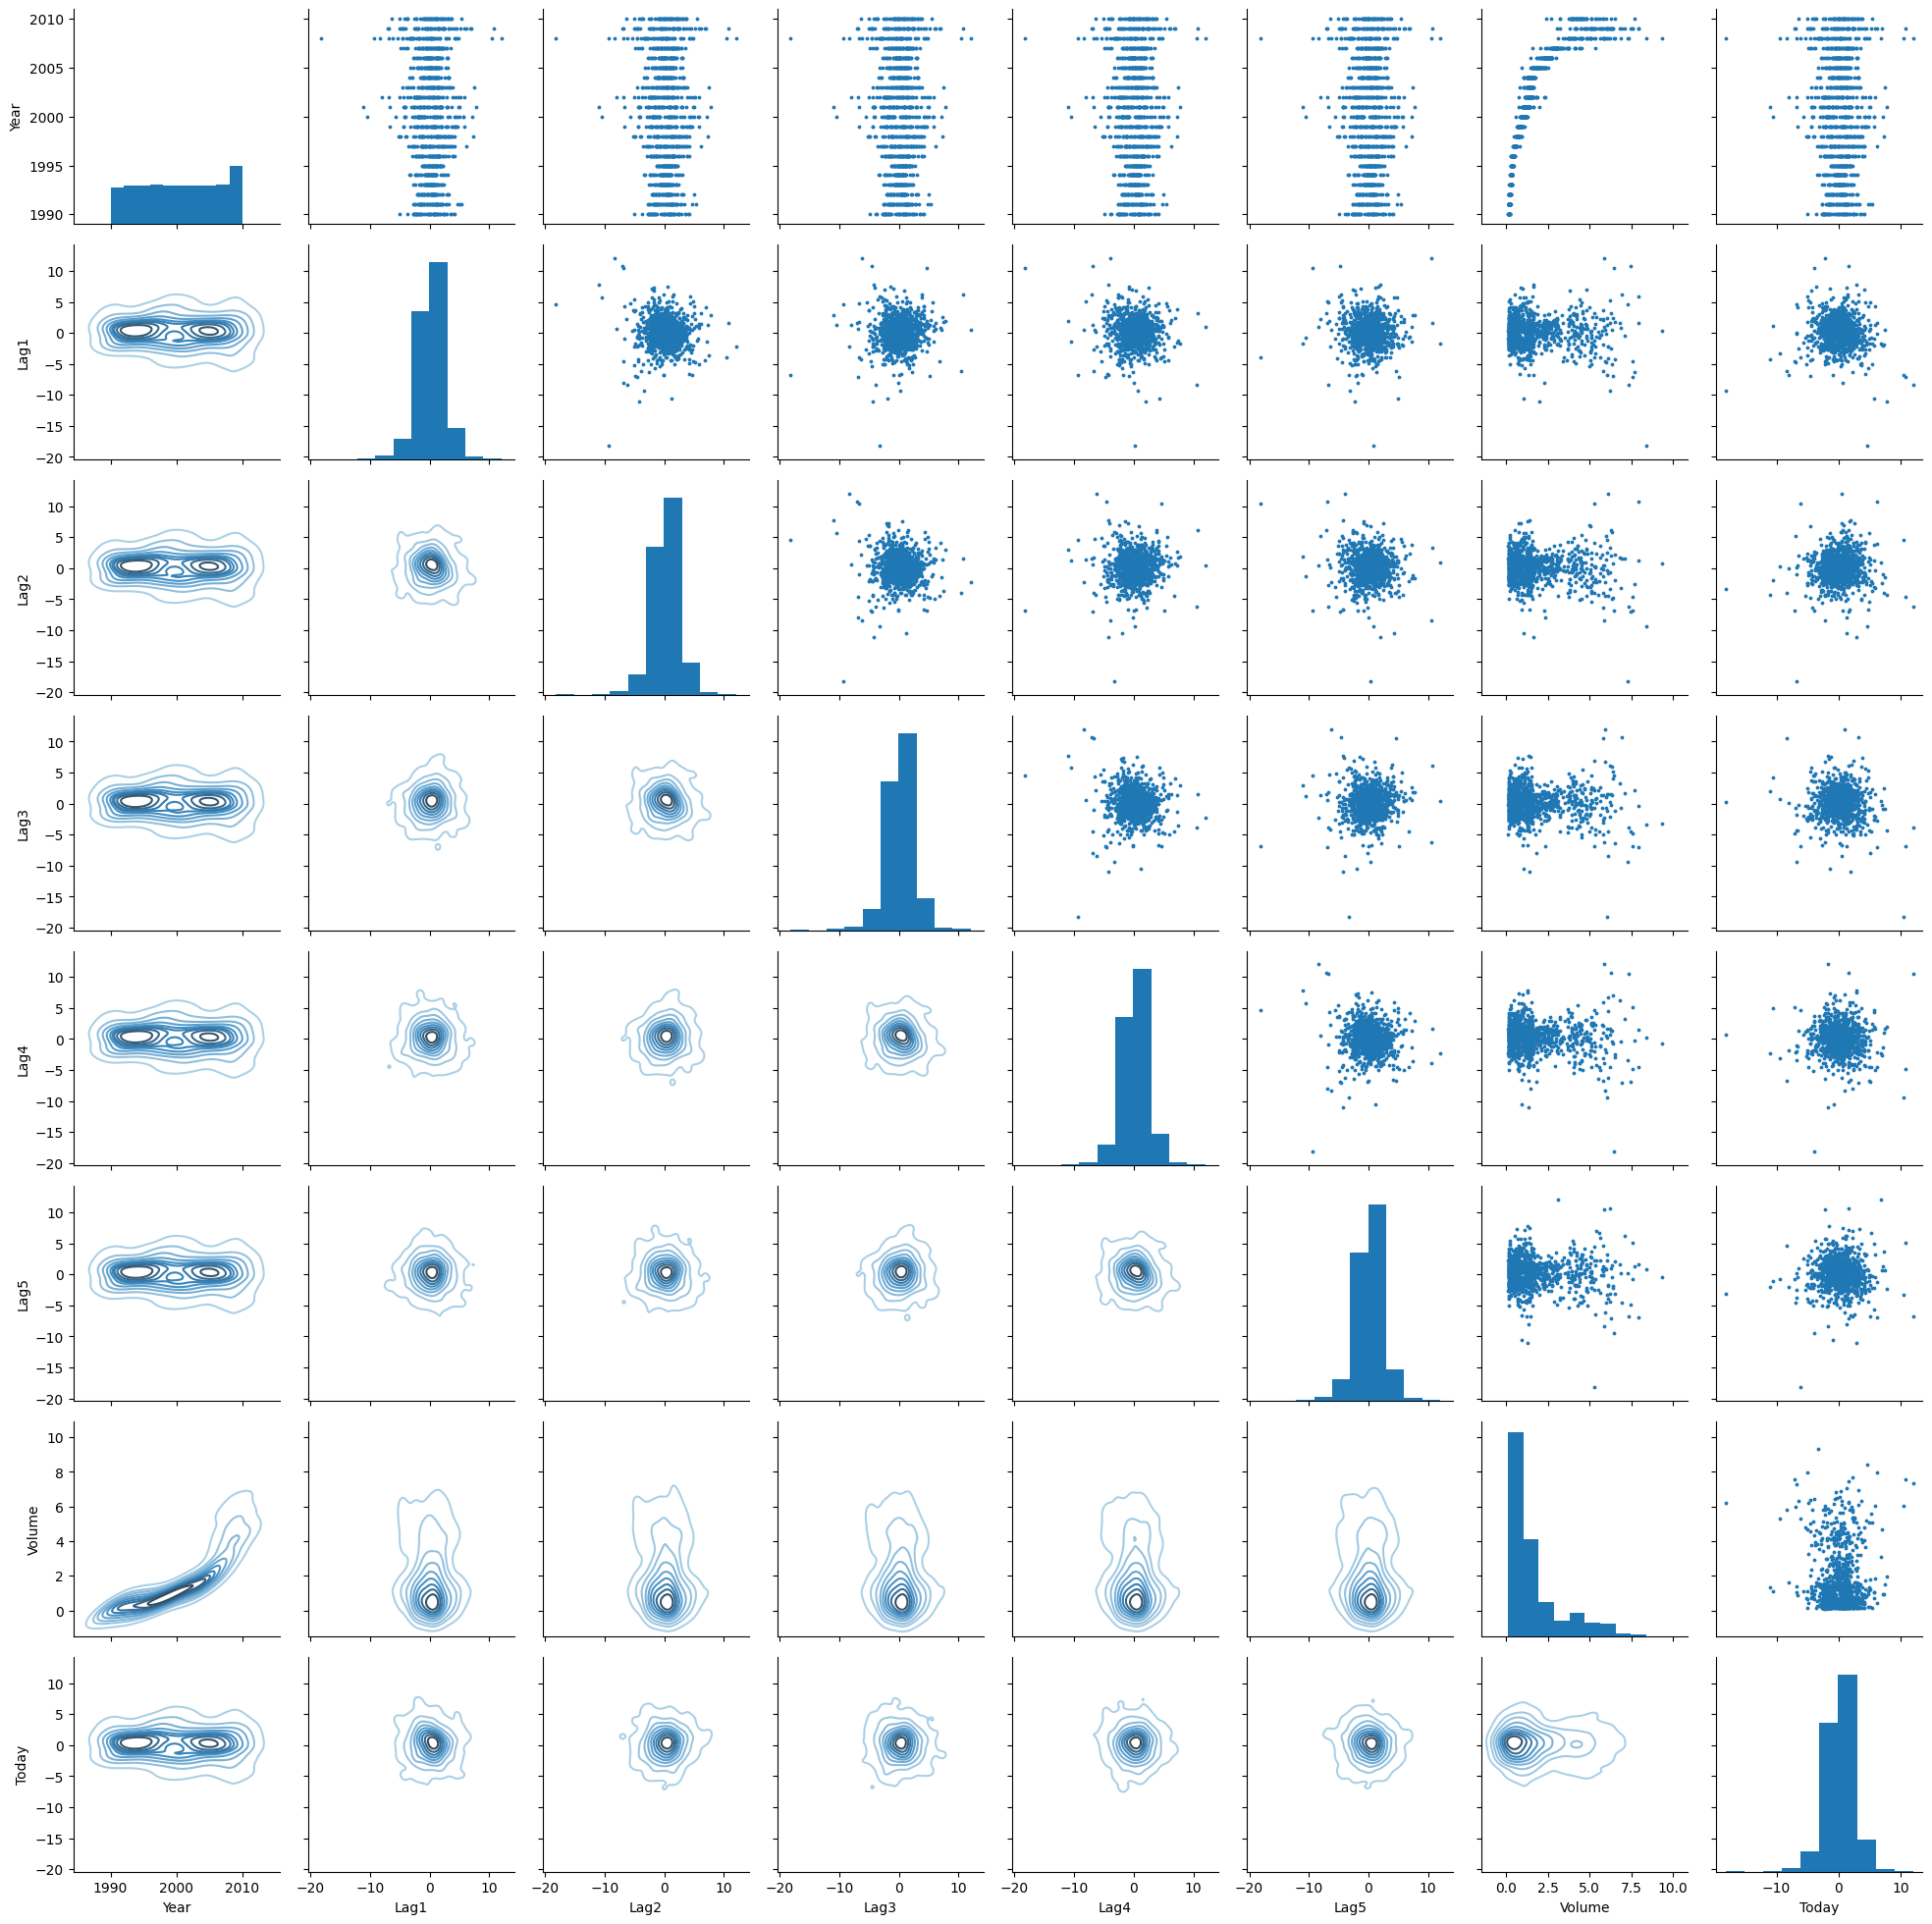

In [ ]:
g = sns.PairGrid(weekly)
g.map_upper(plt.scatter,
            s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
# g.figure.set_size_inches(12,12)



In [ ]:
melt_weekly = weekly.melt(id_vars=["Direction"],
                          value_vars=["Today", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5"],
                          var_name="Lag",
                          value_name="Value")
melt_weekly


,Direction,Lag,Value
0,Down,Today,-0.270
1,Down,Today,-2.576
2,Up,Today,3.514
3,Up,Today,0.712
4,Up,Today,1.178
...,...,...,...
6529,Up,Lag5,0.015
6530,Up,Lag5,3.599
6531,Up,Lag5,-2.173
6532,Up,Lag5,0.043


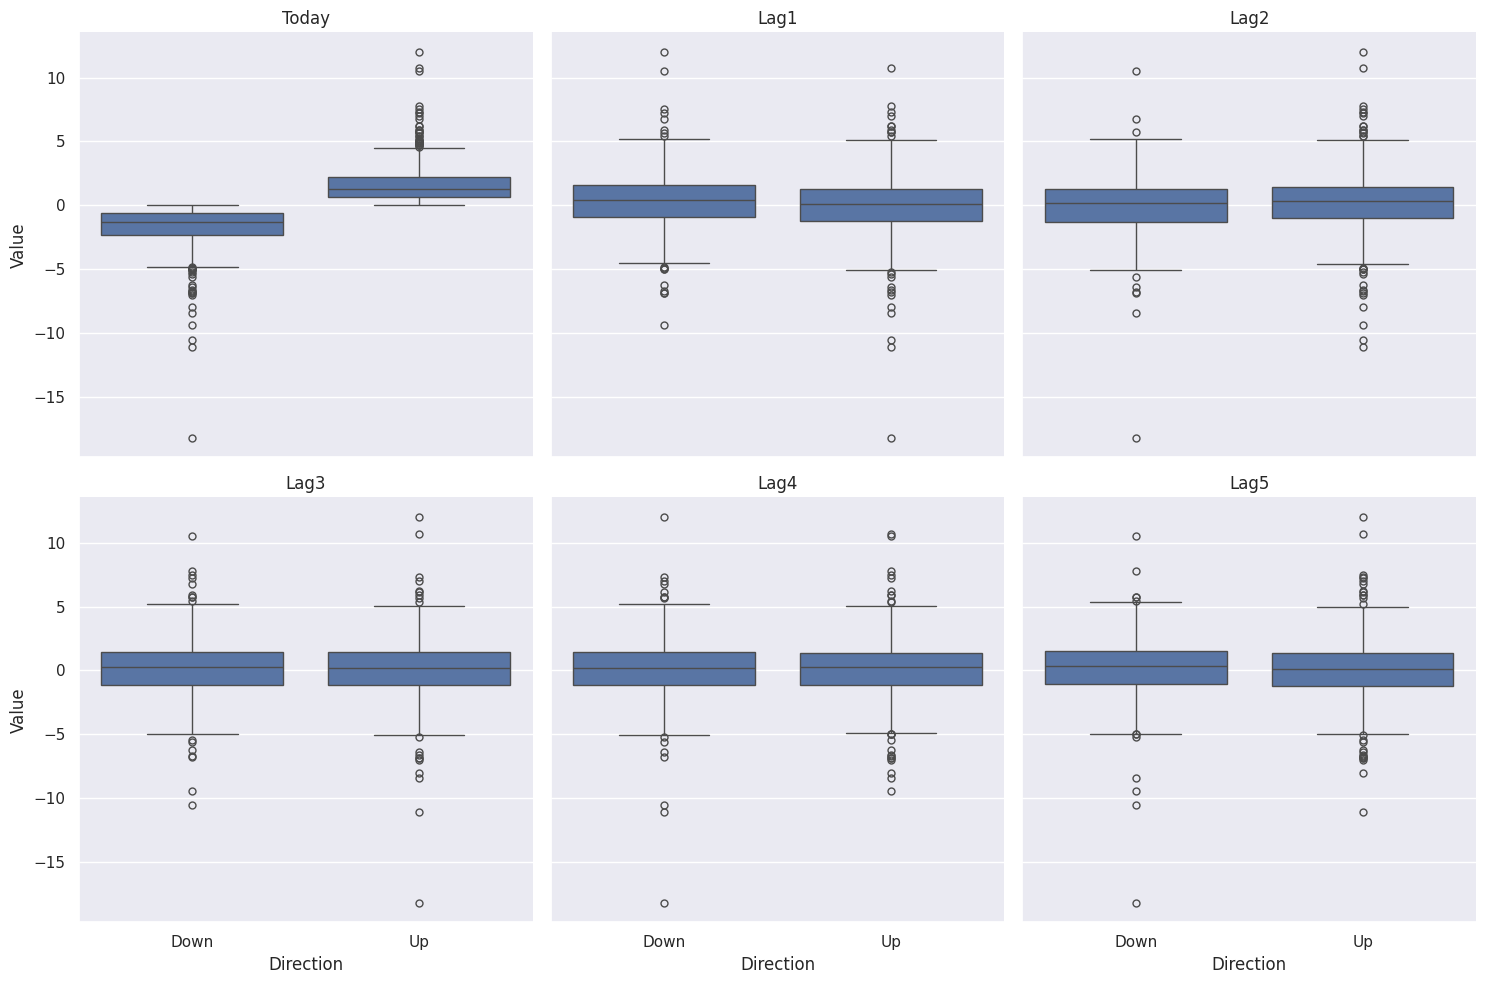

In [ ]:
g = sns.catplot(x="Direction",
                y="Value",
                data=melt_weekly,
                col="Lag",
                kind="box",
                col_wrap=3,
                aspect=1)
g.set_titles("{col_name}")
plt.show()

### b

In [27]:
X = weekly.drop(["Year", "Today", "Direction"], axis=1)
X = sm.add_constant(X)

y = weekly.Direction == "Up"
y

,Direction
0,False
1,False
2,True
3,True
4,True
...,...
1084,True
1085,True
1086,True
1087,True


In [28]:
# modelo logistico
model = sm.GLM(y, X,
               family=sm.families.Binomial())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Sun, 30 Nov 2025   Deviance:                       1486.4
Time:                        22:24:45   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.0

Estadisticamente tenemos que las variables:
Lag1 y el Volume son significativas dado que su p-value < 0.05

### c


In [29]:
print(confusion_table(result.fittedvalues > 0.5, y))

Truth      False  True 
Predicted              
False         54     48
True         430    557


In [30]:
((result.predict(X) > 0.5) == y).mean()

np.float64(0.5610651974288338)

In [32]:
(54 + 557)/1089

0.5610651974288338

In [34]:

1 - (54 + 557)/1089

0.43893480257116624

El modelo logistico con los predictores definidos tiene un performance con un 56% de clasificaciones exitosas. y un 46% de error rate con los falsos verdaderos y los verdaderos etiquetados como falsos.
El modelo sufre mucho para poder etiquetar correctamente las direcciones de bajada. Cosa que no pasa con las subidas para los cuales tiene una matyor precision.

(array([  3.,   5.,  49., 332., 463., 183.,  41.,   7.,   2.,   4.]),
 array([0.2995979 , 0.35072593, 0.40185395, 0.45298198, 0.50411   ,
        0.55523803, 0.60636606, 0.65749408, 0.70862211, 0.75975013,
        0.81087816]),
 <BarContainer object of 10 artists>)

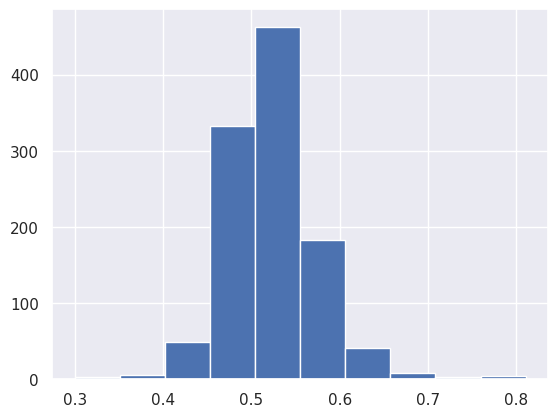

In [9]:
plt.hist(result.fittedvalues)

### d

In [55]:
mask = weekly.Year < 2009
X_train, X_test = weekly[mask][["Lag2"]], weekly[~mask][["Lag2"]]
y_train, y_test = weekly.Direction[mask] == "Up", weekly.Direction[~mask] == "Up"


In [56]:
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)


In [57]:
# modelo
model_Lag1 = sm.GLM(y_train,
                    X_train,
                    family=sm.families.Binomial())
result_Lag1 = model_Lag1.fit()
print(result_Lag1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Sun, 30 Nov 2025   Deviance:                       1350.5
Time:                        22:53:25   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.0

In [58]:
# matriz de confucion con los datos de testeo
predict_test = result_Lag1.predict(X_test) > 0.5
print(confusion_table(predict_test, y_test))


Truth      False  True 
Predicted              
False          9      5
True          34     56


In [59]:
(y_test == predict_test).mean()

np.float64(0.625)

In [60]:
(56 + 5) / y_test.shape[0]

0.5865384615384616

Obtenemos un accuracy de 62.5% lo cual es mejor que hacer una adivinacion con probabilidad de 50%. y en el caso de que elijamos solo UP tendriamos una mejora del 3.5% aproximadamente.

### e

In [62]:
# LDA
#+++++++===========
# datos
mask = weekly.Year < 2009
X_train, X_test = weekly[mask][["Lag2"]], weekly[~mask][["Lag2"]]
y_train, y_test = weekly.Direction[mask] == "Up", weekly.Direction[~mask] == "Up"

X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)


In [ ]:
# modelo LDA
